In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import random
from scipy import stats, spatial
import pickle
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

In [3]:
data_path = '../../data/tfidf_prev_future/'

In [4]:
prev_list = [i for i in os.listdir(data_path) if 'toprev' in i]
future_list = [i for i in os.listdir(data_path) if 'tofuture' in i]

In [5]:
def create_normed_dfs(df):
    df = df.replace([np.inf, -np.inf], np.nan)
    df['Kudos'] = df['Kudos'].fillna(0)
    df['Kudos'] = df['Kudos']/df['Chapters']
    df['Kudos'] = np.log(df['Kudos']+0.001)
    df = df.replace([np.inf, -np.inf], np.nan)
    df['Kudos'].dropna()
    df['Kudos'] = (df['Kudos'] - df['Kudos'].mean())/df['Kudos'].std(ddof=0)
    df['Kudos'].dropna()
    return df

In [6]:
prev_df = []
for fandom in prev_list:
    df = pd.read_csv(os.path.join(data_path,fandom), sep = '\t')
    df = create_normed_dfs(df)
    prev_df.append(df)
prev_df = pd.concat(prev_df)

In [7]:
future_df = []
for fandom in future_list:
    df = pd.read_csv(os.path.join(data_path,fandom), sep = '\t')
    df = create_normed_dfs(df)
    future_df.append(df)
future_df = pd.concat(future_df)

In [8]:
len(prev_df), len(future_df)

(607287, 407407)

In [9]:
prev_df.columns.values

array(['index', 'AdditionalTags', 'ArchiveWarnings', 'Author',
       'Bookmarks', 'Category', 'ChapterIndex', 'Chapters', 'Characters',
       'Comments', 'CompleteDate', 'Fandoms', 'Hits', 'Kudos', 'Language',
       'Notes', 'PublishDate', 'Rating', 'Relationship', 'Summary',
       'Title', 'URL', 'UpdateDate', 'Words', 'Cos'], dtype=object)

In [10]:
prev_df.rename(columns={'Cos':'Novelty'}, inplace=True)

In [11]:
future_df.columns.values

array(['index', 'AdditionalTags', 'ArchiveWarnings', 'Author',
       'Bookmarks', 'Category', 'ChapterIndex', 'Chapters', 'Characters',
       'Comments', 'CompleteDate', 'Fandoms', 'Hits', 'Kudos', 'Language',
       'Notes', 'PublishDate', 'Rating', 'Relationship', 'Summary',
       'Title', 'URL', 'UpdateDate', 'Words', 'Cos'], dtype=object)

In [12]:
future_df.rename(columns={'Cos':'Transience'}, inplace=True)

In [13]:
df_all = pd.merge(prev_df, future_df, on=['AdditionalTags', 'ArchiveWarnings', 'Author',
       'Bookmarks', 'Category', 'ChapterIndex', 'Chapters', 'Characters',
       'Comments', 'CompleteDate', 'Fandoms', 'Hits', 'Language',
       'Notes', 'PublishDate', 'Rating', 'Relationship', 'Summary',
       'Title', 'URL', 'UpdateDate', 'Words'])

In [14]:
df_all[['Kudos_x', 'Kudos_y']].head(2)

,Kudos_x,Kudos_y
0,-3.837879,-3.837196
1,-0.362948,-0.361320


In [15]:
df_all['Kudos_x'] = df_all['Kudos_x'].fillna(0)

In [16]:
len(df_all)

414242

In [17]:
df_all['Resonance'] = df_all['Novelty'] - df_all['Transience']

In [18]:
res = df_all['Resonance'].tolist()

In [25]:
center = int(len(df_all)/2)

In [26]:
center

207121

In [29]:
df_all.sort_values(by='Resonance').iloc[center: center+10].URL.tolist()

['http://archiveofourown.org/works/5589115',
 'http://archiveofourown.org/works/5321549/chapters/13178296?view_adult=true',
 'http://archiveofourown.org/works/2708411/chapters/6769268',
 'http://archiveofourown.org/works/733094/chapters/1409187?view_adult=true',
 'http://archiveofourown.org/works/4823363/chapters/11307076',
 'http://archiveofourown.org/works/4326978',
 'http://archiveofourown.org/works/1644896/chapters/3749647?view_adult=true',
 'http://archiveofourown.org/works/4472696',
 'http://archiveofourown.org/works/874470',
 'http://archiveofourown.org/works/736744']

Text(0.5, 0, 'Resonance')

/anaconda3/envs/python36/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
/anaconda3/envs/python36/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


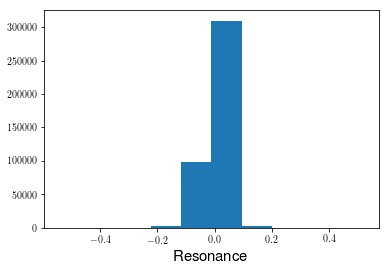

In [18]:
plt.hist(res)
plt.xlabel('Resonance', fontsize=15)

/anaconda3/envs/python36/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.
/anaconda3/envs/python36/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.


(-0.1, 0.1)

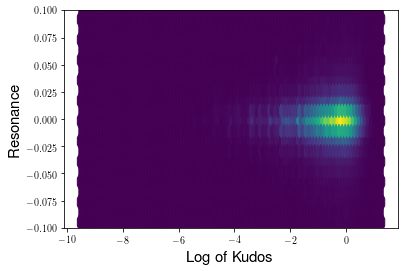

In [19]:
plt.hexbin(np.log(df_all['Kudos_x'].tolist()), df_all['Resonance'].tolist())
plt.xlabel('Log of Kudos', fontsize=15)
plt.ylabel('Resonance', fontsize=15)
plt.ylim(-0.1, 0.1)

In [40]:
stats.pearsonr(df_all['Kudos_x'].tolist(), df_all['Resonance'].tolist())

(-0.025203018772684122, 3.434449996843453e-59)

In [21]:
np.percentile(sorted(df_all['Novelty'].tolist()), [0, 25, 5, 75, 100])

array([0.05655838, 0.27845869, 0.16024989, 0.84121726, 0.9974296 ])

/anaconda3/envs/python36/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
/anaconda3/envs/python36/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  


Text(0.5, 1.0, 'High novelty')

/anaconda3/envs/python36/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


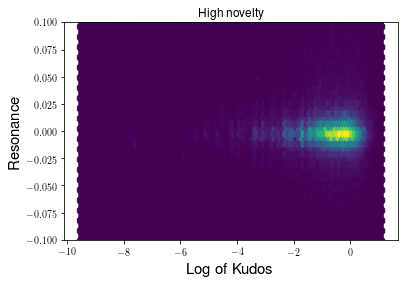

In [22]:
top_novelty = df_all[df_all['Novelty'] >= 0.841]
plt.hexbin(np.log(top_novelty['Kudos_x'].tolist()), top_novelty['Resonance'].tolist())
plt.xlabel('Log of Kudos', fontsize=15)
plt.ylabel('Resonance', fontsize=15)
plt.ylim(-0.1, 0.1)
plt.title('High novelty')

/anaconda3/envs/python36/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
/anaconda3/envs/python36/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  


Text(0.5, 1.0, 'Low novelty')

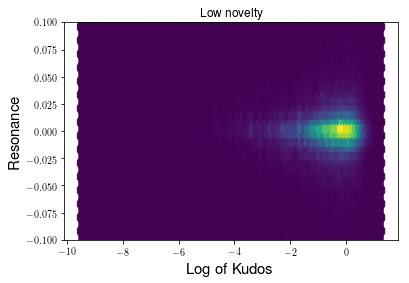

In [37]:
tail_novelty = df_all[df_all['Novelty'] <= 0.278]
plt.hexbin(np.log(tail_novelty['Kudos_x'].tolist()), tail_novelty['Resonance'].tolist())
plt.xlabel('Log of Kudos', fontsize=15)
plt.ylabel('Resonance', fontsize=15)
plt.ylim(-0.1, 0.1)
plt.title('Low novelty')

In [24]:
def var_bootstrap_resample(li):
    if len(li) > 0:
        var_original = np.var(li)
        var_s = []
        for i in range(100):
            sample = []
            for i in range(len(li)):
                sample.append(random.choice(li))
            var_s.append(np.var(sample))
        tail = sorted(var_s)[5]
        head = sorted(var_s)[95]
        return (var_original, tail, head)

In [25]:
def ave_bootstrap_resample(li):
    if len(li) > 0:
        ave_original = np.average(li)
        ave_s = []
        for i in range(100):
            sample = []
            for i in range(len(li)):
                sample.append(random.choice(li))
            ave_s.append(np.average(sample))
        tail = sorted(ave_s)[5]
        head = sorted(ave_s)[95]
        return (ave_original, tail, head)

In [26]:
def create_dict(df, resonance_field, suc_field):
    
    # Make bins
    df[resonance_field] = df[resonance_field].astype(float)
    term_n = sorted(df[resonance_field].tolist())
    term_n = np.quantile(term_n, [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])
    term_n = np.insert(term_n, 0, 0)
    term_n = np.concatenate([term_n, [1]])
    dic = {}
    for i in range(len(term_n)-1):
        df_s = df[(df[resonance_field] >= term_n[i]) & (df[resonance_field] < term_n[i+1])]
        li = df_s[suc_field].tolist()
        if len(li) > 0:
            dic[term_n[i]] = ave_bootstrap_resample(li)
    return dic

In [27]:
def generate_res(df, resonance_field, suc_field):
    
    df = df.sort_values(by = resonance_field)
    df = df.sort_values(by = suc_field)
    dic = create_dict(df, resonance_field, suc_field)

    return dic
    

In [28]:
resonance_kudos_dict_var = generate_res(df_all, 'Resonance', 'Kudos_x')

In [29]:
resonance_kudos_dict_var

{-0.024486895199449514: (0.052318444275704215,
  0.04371825948075508,
  0.05949391619054278),
 -0.013813791909704375: (0.05220585286659595,
  0.0450210451291504,
  0.05951149415562555),
 -0.008280528053707659: (0.027929161480136595,
  0.020282697709259216,
  0.0383424008266081),
 -0.004410606143675651: (0.0016426957357061581,
  -0.005587340296876858,
  0.008694486340515954),
 -0.0011721725630045032: (-0.02814932978506411,
  -0.03583597303615235,
  -0.020891257287510512),
 0.0019944383088459786: (-0.04412593727828002,
  -0.05284498353341345,
  -0.0358102078587255),
 0.0056972644268100305: (-0.05455154143891778,
  -0.06311844855100533,
  -0.04674713237557317),
 0.010876350480529033: (-0.062396208040199214,
  -0.0710266305774674,
  -0.05467538310613835),
 0.02097422269336817: (-0.1087862581825078,
  -0.11798576284613509,
  -0.09884546342803502)}

In [30]:
# pickle.dump(resonance_kudos_dict_var, open('resonance_kudos_dict_var.p', 'wb'))

In [31]:
# tfidf_kudos_dict_var = pickle.load(open('tfidf_kudos_dict_var.p', 'rb'))

In [32]:
def create_xs(keys):
    xs = []
    for i in range(len(keys)-1):
        xs.append(keys[i] + (keys[i+1] - keys[i])/2)
    return xs

In [33]:
def extract_plot_vals(dic):
    keys = sorted(dic.keys())
    x = create_xs(keys)
    y = [dic[j][0] for j in keys[:-1]]
    lower_error = [dic[j][0] - dic[j][1] for j in keys[:-1]]
    upper_error = [dic[j][2] - dic[j][0] for j in keys[:-1]]
    asymmetric_error = [lower_error, upper_error]
    return x,y,asymmetric_error

Text(0, 0.5, 'Kudos')

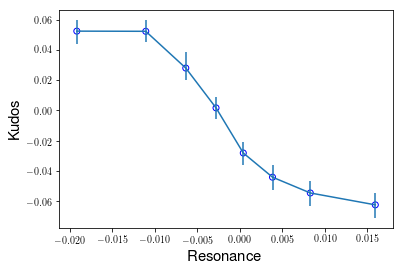

In [36]:
fig = plt.figure()
# fig.subplots_adjust(bottom = 0.4)


plt.subplot(1, 1, 1)

x, y, err = extract_plot_vals(resonance_kudos_dict_var)
plt.errorbar(x, y, yerr=err)
plt.scatter(x, y, label = 'Kudos',facecolor='none',edgecolor='blue')
plt.xlabel('Resonance', fontsize=15)
plt.ylabel('Kudos', fontsize=15)